## Import et nettoyage de données

In [144]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [145]:
df = pd.read_csv(r"C:\Users\PC\Desktop\Dyma\ML\09_titanic_project\titanic.csv")

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
df["Embarked"].nunique()

3

In [149]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [150]:
df.dropna(subset=["Age", "Embarked"], inplace= True)

df["SibSp"] = df["SibSp"] + df["Parch"]
df.rename(columns = {"SibSp" : "Relatives"}, inplace = True)

df.drop(["Name", "Cabin", "Parch"], axis = 1 , inplace = True)

In [151]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Relatives      0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [152]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Relatives,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,113803,53.1000,S
4,5,0,3,male,35.0,0,373450,8.0500,S


In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,Relatives,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.946629,34.567251
std,258.683191,0.491139,0.836854,14.492933,1.485027,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,7.000000,512.329200


## Recherche sur les passagers 

<Axes: >

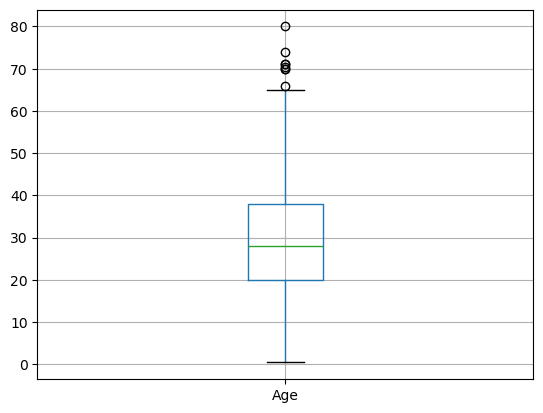

In [155]:
plt.figure()

df.boxplot(column = ["Age"])

# 25% des passagers avaient moins de 20ans 


In [157]:
df_men = df[(df["Sex"]=="male") & (df["Age"]>= 18)]
df_women = df[(df["Sex"]=="female") & (df["Age"]>= 18)]
df_children = df[df["Age"]<18]

In [158]:
plt.style.use("bmh")

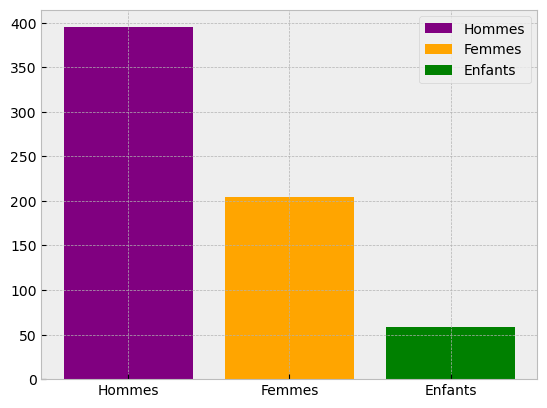

In [159]:
colors = ["purple", "orange", "green"]
groupes = ["Hommes", "Femmes", "Enfants"]

plt.figure()

plt.bar(groupes[0], df_men["Sex"].value_counts(), label=groupes[0], color=colors[0])
plt.bar(groupes[1], df_women["Sex"].value_counts(), label=groupes[1], color=colors[1])
plt.bar(groupes[2], df_children["Sex"].value_counts(), label=groupes[2], color=colors[2])

plt.legend(groupes)

## Majorité d'hommes, très peu d'enfants

Text(0, 0.5, 'Fréquence')

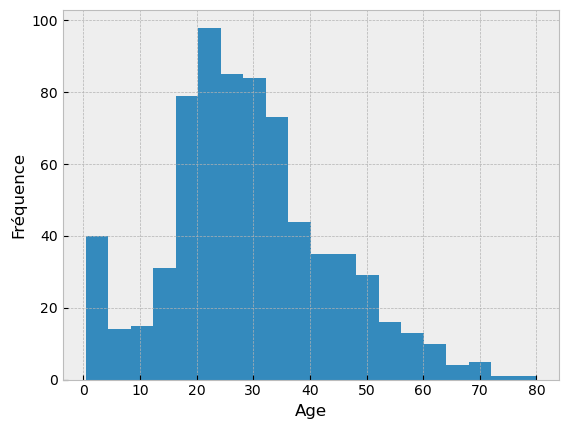

In [161]:
plt.figure()

df["Age"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Fréquence")


# Très peu de personnes âgées, beaucoup d'enfants en bas âge

In [163]:
mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode()

print(f"Âge moyen = {np.round(mean_age, decimals = 1)} ans.")
print(f"Âge médian = {median_age}")
print(f"Mode = {mode_age}")

Âge moyen = 29.6 ans.
Âge médian = 28.0
Mode = 0    24.0
Name: Age, dtype: float64


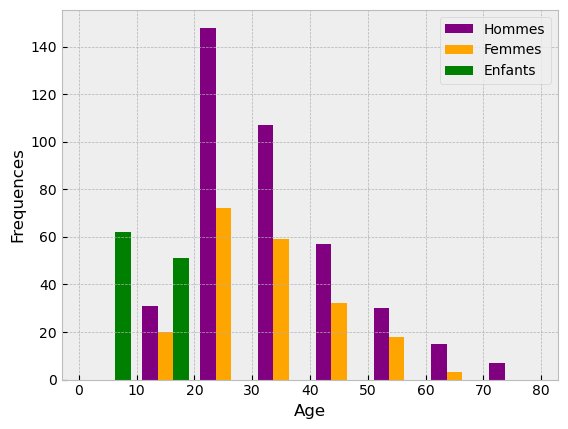

In [164]:
plt.figure()
plt.hist([df_men["Age"], df_women["Age"], df_children["Age"]], bins = [0,10,20,30,40,50,60,70,80], color = colors )
plt.xlabel("Age")
plt.ylabel("Frequences")
plt.legend(groupes)

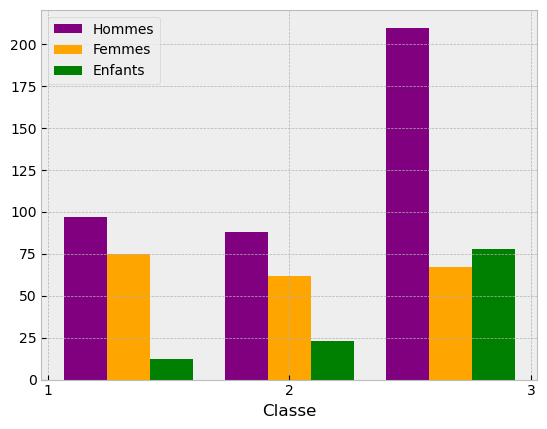

In [165]:
plt.figure()
plt.hist([df_men["Pclass"], df_women["Pclass"], df_children["Pclass"]], bins = 3, color = colors)
plt.xticks([1,2,3])
plt.xlabel("Classe")
plt.legend(groupes)

## En troisième classe on largement plus d'hommes que de femmes et d'enfants. 

In [167]:
pd.unique(df["Embarked"])

array(['S', 'C', 'Q'], dtype=object)

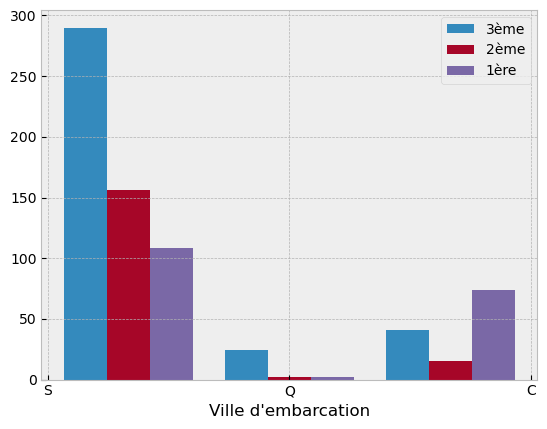

In [168]:
plt.figure()
plt.hist([df[df["Pclass"] == 3]["Embarked"], df[df["Pclass"] == 2]["Embarked"], df[df["Pclass"] == 1]["Embarked"]],bins=3)
plt.xlabel("Ville d'embarcation")
plt.legend(["3ème", "2ème", "1ère"])

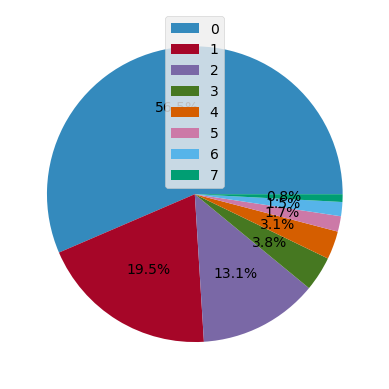

In [169]:
plt.figure()
plt.pie(df["Relatives"].value_counts(), autopct = "%1.1f%%")
plt.legend(["0","1","2","3","4","5","6","7"])

## 3. Facteurs survie ? 

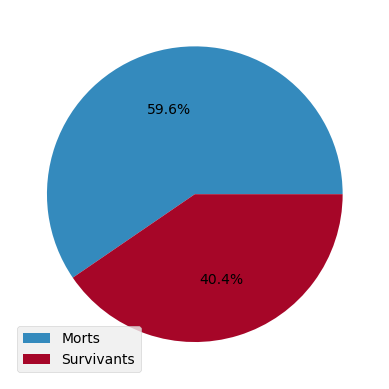

In [171]:
plt.figure()

plt.pie(df["Survived"].value_counts(), autopct = "%.1f%%")
plt.legend(["Morts", "Survivants"])

In [175]:
df.groupby("Sex").mean(numeric_only=True).round(2)

,PassengerId,Survived,Pclass,Age,Relatives,Fare
Sex,,,,,,
female,440.15,0.75,2.07,27.75,1.36,47.33
male,453.41,0.21,2.34,30.73,0.71,27.27


In [177]:
df.groupby("Sex").median(numeric_only=True).round(2)

,PassengerId,Survived,Pclass,Age,Relatives,Fare
Sex,,,,,,
female,428.0,1.0,2.0,27.0,1.0,26.0
male,456.0,0.0,3.0,29.0,0.0,13.0


In [179]:
df.groupby(["Sex", "Pclass"]).mean(numeric_only=True)

PassengerId  Survived        Age  Relatives        Fare
Sex    Pclass                                                         
female 1        479.060241  0.963855  34.240964   1.060241  108.619680
       2        442.905405  0.918919  28.722973   1.121622   21.951070
       3        406.500000  0.460784  21.750000   1.774510   15.875369
male   1        451.910891  0.396040  41.281386   0.712871   71.142781
       2        450.333333  0.151515  30.740707   0.616162   21.113131
       3        455.217391  0.150198  26.507589   0.747036   12.162695

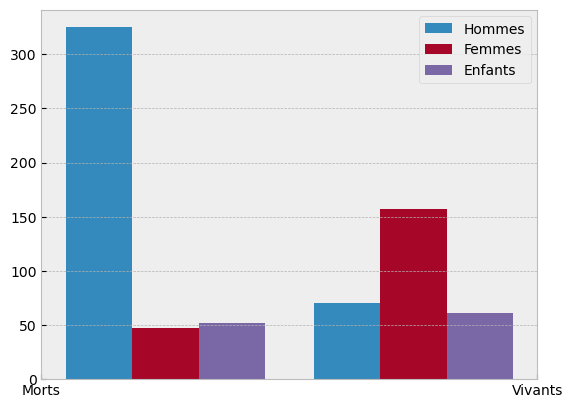

In [189]:
plt.figure() 
plt.hist([df_men["Survived"],df_women["Survived"],df_children["Survived"]], bins = 2)
plt.xticks(ticks = [0,1], labels = ["Morts", "Vivants"])
plt.legend(groupes)

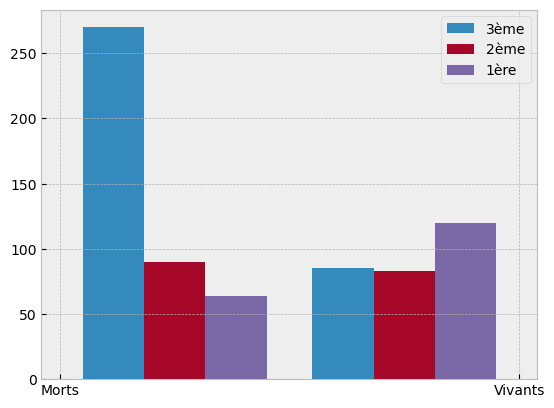

In [191]:
plt.figure()
plt.hist([df[df["Pclass"]==3]["Survived"], df[df["Pclass"]==2]["Survived"], df[df["Pclass"]==1]["Survived"]], bins = 2)
plt.xticks(ticks=[0,1], labels=["Morts", "Vivants"])
plt.margins(x=0.1)
plt.legend(["3ème", "2ème", "1ère"])